In [ ]:
import numpy as np
import pandas as pd

# Load data
kenpom_metrics = pd.read_csv('DEV _ March Madness (1).csv')
tournament_data = pd.read_csv('538 Ratings.csv')

In [ ]:
# Choose features and narrow down to March Madness teams
features = ['Season', 'Short Conference Name', 'Adjusted Temo', 'Adjusted Offensive Efficiency',
            'Adjusted Defensive Efficiency', 'Avg Possession Length (Offense)', 'Avg Possession Length (Defense)',
            'eFGPct', 'TOPct', 'ORPct', 'FTRate', 'Off2PtFG', 'Off3PtFG', 'DefFT', 'Def2PtFG', 'Def3PtFG', 'AdjEM',
            'FTPct', 'BlockPct', 'OppFG2Pct', 'OppFG3Pct', 'OppFTPct', 'OppBlockPct', 'ARate', 'OppARate', 'StlRate',
            'OppStlRate', 'AvgHeight', 'EffectiveHeight', 'Experience', 'Bench', 'Net Rating', 'Mapped ESPN Team Name',
            'Current Coach', 'Active Coaching Length', 'Seed', 'Post-Season Tournament', 'Top 12 in AP Top 25 During Week 6?']

data = kenpom_metrics[features]

data = data[data['Post-Season Tournament'] == 'March Madness']

In [ ]:
# Fill in the median value for 'Avg Possession Length (Offense + Defense)', 'AvgHeight', 'Effective Height'
data['Avg Possession Length (Offense)'].fillna(data['Avg Possession Length (Offense)'].median(), inplace=True)
data['Avg Possession Length (Defense)'].fillna(data['Avg Possession Length (Defense)'].median(), inplace=True)
data['AvgHeight'].fillna(data['AvgHeight'].median(), inplace=True)
data['EffectiveHeight'].fillna(data['EffectiveHeight'].median(), inplace=True)

<ipython-input-138-1503ea364ba0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Avg Possession Length (Offense)'].fillna(data['Avg Possession Length (Offense)'].median(), inplace=True)
<ipython-input-138-1503ea364ba0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [ ]:
# Fill in the NA coach
data.loc[4754, 'Current Coach'] = 'John Gallagher'
data.loc[4754, 'Active Coaching Length'] = '12 years'

In [ ]:
# Years of tournament coverage
seasons = data['Season'].unique()
seasons = np.sort(seasons)
print(seasons)

# Figure out the new NA value
print(data[data['Season'].isna()])

[2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2021 2022 2023 2024 2025]
Empty DataFrame
Columns: [Season, Short Conference Name, Adjusted Temo, Adjusted Offensive Efficiency, Adjusted Defensive Efficiency, Avg Possession Length (Offense), Avg Possession Length (Defense), eFGPct, TOPct, ORPct, FTRate, Off2PtFG, Off3PtFG, DefFT, Def2PtFG, Def3PtFG, AdjEM, FTPct, BlockPct, OppFG2Pct, OppFG3Pct, OppFTPct, OppBlockPct, ARate, OppARate, StlRate, OppStlRate, AvgHeight, EffectiveHeight, Experience, Bench, Net Rating, Mapped ESPN Team Name, Current Coach, Active Coaching Length, Seed, Post-Season Tournament, Top 12 in AP Top 25 During Week 6?]
Index: []

[0 rows x 38 columns]


In [ ]:
# Subset the original data for only 2016-2024
mm_data = data[(data['Season'] >= 2016) & (data['Season'] <= 2023)]

In [ ]:
# Use the round to find the number of wins and then create a win score
for index, row in tournament_data.iterrows():
    if row['ROUND'] == 68:
        tournament_data.at[index, 'WINS'] = 0
    if row['ROUND'] == 64:
        tournament_data.at[index, 'WINS'] = 0
    if row['ROUND'] == 32:
        tournament_data.at[index, 'WINS'] = 1
    if row['ROUND'] == 16:
        tournament_data.at[index, 'WINS'] = 2
    if row['ROUND'] == 8:
        tournament_data.at[index, 'WINS'] = 3
    if row['ROUND'] == 4:
        tournament_data.at[index, 'WINS'] = 4
    if row['ROUND'] == 2:
        tournament_data.at[index, 'WINS'] = 5
    if row['ROUND'] == 1:
        tournament_data.at[index, 'WINS'] = 6

for index, row in tournament_data.iterrows():
    if row['WINS'] == 0:
        tournament_data.at[index, 'WIN_SCORE'] = 0
    if row['WINS'] == 1:
        tournament_data.at[index, 'WIN_SCORE'] = 1
    if row['WINS'] == 2:
        tournament_data.at[index, 'WIN_SCORE'] = 2
    if row['WINS'] == 3:
        tournament_data.at[index, 'WIN_SCORE'] = 4
    if row['WINS'] == 4:
        tournament_data.at[index, 'WIN_SCORE'] = 8
    if row['WINS'] == 5:
        tournament_data.at[index, 'WIN_SCORE'] = 16
    if row['WINS'] == 6:
        tournament_data.at[index, 'WIN_SCORE'] = 32

In [ ]:
# Manually match team names
name_corrections = {
    'Michigan St.': 'Michigan State',
    'Kansas St.': 'Kansas State',
    'North Carolina St.': 'NC State',
    'Connecticut': 'UConn',
    'Miami FL': 'Miami',
    'Iowa St.': 'Iowa State',
    'Utah St.': 'Utah State',
    'Penn St.': 'Penn State',
    'Boise St.': 'Boise State',
    'Mississippi St.': 'Mississippi State',
    'Arizona St.': 'Arizona State',
    'College of Charleston': 'Charleston',
    'Kent St.': 'Kent State',
    'Lousiana': 'Louisiana Lafayette',
    'Kennesaw St.': 'Kennesaw State',
    'Texas A&M Corpus Chris': 'Texas A&M-Corpus Christi',
    'Southeast Missouri St.': 'Southeast Missouri State',
    'Colorado St.': 'Colorado State',
    'Ohio St.': 'Ohio State',
    'Murray St.': 'Murray State',
    'South Dakota St.': 'South Dakota State',
    'New Mexico St.': 'New Mexico State',
    'Jacksonville St.': 'Jacksonville State',
    'Cal St. Fullerton': 'Cal State Fullerton',
    'Georgia St.': 'Georgia State',
    'Wright St.': 'Wright State',
    'Norflok St.': 'Norfolk State',
    'Florida St.': 'Florida State',
    'Oklahoma St.': 'Oklahoma State',
    'Oregon St.': 'Oregon State',
    'Wichita St.': 'Wichita State',
    'Morehead St.': 'Morehead State',
    'Cleveland St.': 'Cleveland State',
    'Appalachian St.': 'App State',
    'Mississippi': 'Ole Miss',
    'North Dakota St.': 'North Dakota State',
    'Gardner Webb': 'Gardner-Webb',
    'Penn': 'Pennsylvania',
    'Central Michigan': 'C Michigan',
    'LIU Brooklyn': 'Long Island University',
    'East Tennessee St.': 'East Tennessee State',
    'Cal St. Bakersfield': 'Cal State Bakersfield',
    'Fresno St.': 'Fresno State',
    'Weber St.': 'Weber State',
    'San Diego St.' : 'San Diego State',
    'Montana St.' : 'Montana State',
    'Norfolk St.' : 'Norfolk State'
}

# Apply corrections to tournament_data['TEAM']
tournament_data['TEAM'] = tournament_data['TEAM'].replace(name_corrections)

In [ ]:
# Join the data by team and tournament year
merged_data = pd.merge(mm_data, tournament_data, left_on=['Mapped ESPN Team Name', 'Season'], right_on=['TEAM', 'YEAR'], how='left')
print(merged_data.shape)

# Assure there are no missing values for team
print(merged_data.isnull().sum())

(475, 47)
Season                                0
Short Conference Name                 0
Adjusted Temo                         0
Adjusted Offensive Efficiency         0
Adjusted Defensive Efficiency         0
Avg Possession Length (Offense)       0
Avg Possession Length (Defense)       0
eFGPct                                0
TOPct                                 0
ORPct                                 0
FTRate                                0
Off2PtFG                              0
Off3PtFG                              0
DefFT                                 0
Def2PtFG                              0
Def3PtFG                              0
AdjEM                                 0
FTPct                                 0
BlockPct                              0
OppFG2Pct                             0
OppFG3Pct                             0
OppFTPct                              0
OppBlockPct                           0
ARate                                 0
OppARate                      

In [ ]:
# Find the missing 15 teams
missing_teams = merged_data[merged_data['TEAM'].isna()]['Mapped ESPN Team Name'].unique()
print("Teams with no match:", missing_teams)

# Due to mistmatched data, removed the NA instances
merged_data = merged_data.dropna(subset=['TEAM'])

# For time purposes, drop them
merged_data = merged_data.dropna(subset=['WIN_SCORE'])

Teams with no match: ['Louisiana' 'Utah State']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables and change data types of specific columns
encoder = LabelEncoder()
merged_data['Short Conference Name'] = encoder.fit_transform(merged_data['Short Conference Name'])
merged_data['Mapped ESPN Team Name'] = encoder.fit_transform(merged_data['Mapped ESPN Team Name'])
merged_data['Current Coach'] = encoder.fit_transform(merged_data['Current Coach'])
merged_data['Post-Season Tournament'] = encoder.fit_transform(merged_data['Post-Season Tournament'])
merged_data['Top 12 in AP Top 25 During Week 6?'] = encoder.fit_transform(merged_data['Top 12 in AP Top 25 During Week 6?'])

merged_data['WINS'] = merged_data['WINS'].astype(int)
merged_data['WIN_SCORE'] = merged_data['WIN_SCORE'].astype(int)
merged_data['Seed'] = merged_data['Seed'].astype(int)

# Remove ' years' from 'Active Coaching Length' to be treated as an integer
merged_data['Active Coaching Length'] = merged_data['Active Coaching Length'].str.replace(' years', '', regex=False)
merged_data['Active Coaching Length'] = merged_data['Active Coaching Length'].astype(int)

In [ ]:
# Test the model on the 2025 season
current_data = data[data['Season'] == 2025]

# Encode categorical variables and change data types of specific columns
encoder = LabelEncoder()
current_data['Short Conference Name'] = encoder.fit_transform(current_data['Short Conference Name'])
current_data['Current Coach'] = encoder.fit_transform(current_data['Current Coach'])
current_data['Post-Season Tournament'] = encoder.fit_transform(current_data['Post-Season Tournament'])
current_data['Top 12 in AP Top 25 During Week 6?'] = encoder.fit_transform(current_data['Top 12 in AP Top 25 During Week 6?'])

current_data['Seed'] = current_data['Seed'].astype(int)

# Remove ' years' from 'Active Coaching Length' to be treated as an integer
current_data['Active Coaching Length'] = current_data['Active Coaching Length'].str.replace(' years', '', regex=False)
current_data['Active Coaching Length'] = current_data['Active Coaching Length'].astype(int)

current_data.head()

<ipython-input-147-735cf914d411>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_data['Short Conference Name'] = encoder.fit_transform(current_data['Short Conference Name'])
<ipython-input-147-735cf914d411>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_data['Current Coach'] = encoder.fit_transform(current_data['Current Coach'])
<ipython-input-147-735cf914d411>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,Season,Short Conference Name,Adjusted Temo,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Avg Possession Length (Offense),Avg Possession Length (Defense),eFGPct,TOPct,ORPct,...,EffectiveHeight,Experience,Bench,Net Rating,Mapped ESPN Team Name,Current Coach,Active Coaching Length,Seed,Post-Season Tournament,Top 12 in AP Top 25 During Week 6?
0,2025,1,65.7,128.0,89.8,17.0,19.1,57.363184,14.401202,35.180055,...,2.07,1.95792,31.04,38.2,Duke,30,2,1,0,1
4,2025,25,69.6,128.6,92.4,16.3,17.5,55.006890,15.030960,38.149351,...,1.71,2.42082,29.72,36.2,Florida,62,2,1,0,1
5,2025,6,61.4,123.2,87.8,19.5,18.8,52.676338,14.619308,36.135182,...,-0.60,2.64574,29.83,35.4,Houston,31,10,1,0,0
7,2025,25,67.6,128.4,93.4,17.3,17.7,55.711472,13.368911,34.344335,...,0.83,2.80085,33.90,35.0,Auburn,8,10,1,0,1
29,2025,25,63.6,120.3,89.1,18.2,18.7,52.803738,15.993890,35.422343,...,1.25,2.93040,25.27,31.2,Tennessee,49,9,2,0,1


    Season                 Team  Predicted Win Score
0     2025                 Duke            23.612146
1     2025              Florida            21.418344
2     2025              Houston            20.119282
3     2025               Auburn            19.573162
4     2025            Tennessee            16.396828
5     2025              Alabama            12.703238
7     2025       Michigan State             9.145128
6     2025           Texas Tech             8.886095
16    2025            Texas A&M             6.943408
12    2025            Wisconsin             4.830596
8     2025              Gonzaga             4.719299
14    2025             Missouri             4.468489
11    2025             Maryland             4.276491
9     2025           Iowa State             4.248131
17    2025              Clemson             3.836229
15    2025             Kentucky             3.793550
20    2025               Kansas             3.560354
18    2025               Purdue             3.

<Figure size 1000x800 with 0 Axes>

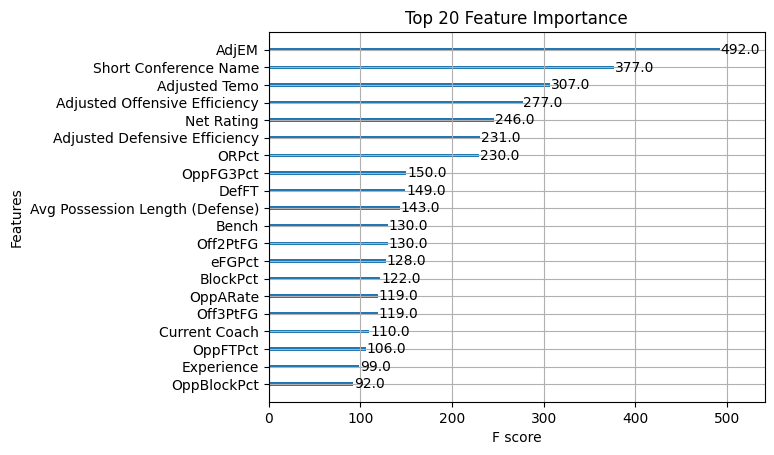

In [ ]:
from xgboost import XGBRegressor

# Get the data and split properly
train_data = merged_data
test_data = current_data

# Split the data
X_train = train_data.drop(columns=['WIN_SCORE', 'WINS', 'TEAM', 'Mapped ESPN Team Name', 'SEED', 'TEAM NO', 'Season', 'POWER RATING',
                                   'POWER RATING RANK', 'ROUND', 'YEAR'])
y_train = train_data['WIN_SCORE']
X_test = test_data.drop(columns=['Mapped ESPN Team Name', 'Season'])

# Best parameters from previous training
best_params = {
    "n_estimators": 300,
    "max_depth": 5,
    "learning_rate": 0.01,
    "subsample": 0.6,
    "colsample_bytree": 0.7
}

# Define the regressor
xgb = XGBRegressor(objective="reg:squarederror", **best_params)

# Fit the model
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Map the years and team names to match for analysis
mapped_team_names = current_data.loc[X_test.index, 'Mapped ESPN Team Name'].values
years = current_data.loc[X_test.index, 'Season'].values

# Put the sorted results in a data frame
results = pd.DataFrame({
    'Season': years,
    'Team': mapped_team_names,
    'Predicted Win Score': y_pred
})

sorted_results = results.sort_values(by='Predicted Win Score', ascending=False)
pd.set_option('display.max_rows', None)

print(sorted_results)

import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot the feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb, importance_type='weight', max_num_features=20)
plt.title("Top 20 Feature Importance")
plt.show()